In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import odr

In [3]:
OI_H_SMC = 8.14 # this is okay cause we are always using photospheric abundances
sigma_OI_H_SMC = 0.08

In [4]:
N_OI_array = np.array([18.018, 18.409, 17.9, 17.837, 18.063]) # np.array([18.018, 18.409, 17.9, 17.721, 17.837, 18.063]) # AV220, NGC330-A02, NGC346-487, SK191, AV95, AV15
N_HI_array = np.array([21.04, 21.60, 21.32, 21.49, 21.58]) # np.array([21.04, 21.60, 21.32, 21.51, 21.49, 21.58])
sigma_OI_array = np.array([0.127, 0.050, 0.144, 0.249, 0.106]) # np.array([0.127, 0.050, 0.144, 0.145, 0.249, 0.106])
OI_H_array = N_OI_array - N_HI_array + 12
depletion_OI_array = OI_H_array - OI_H_SMC 
sigma_depletion_OI_array  = np.sqrt(sigma_OI_array ** 2 + sigma_OI_H_SMC ** 2)

In [17]:
F_star_array = np.array([-0.101, 0.012, 0.065, 0.030, 0.218]) # np.array([-0.101, 0.012, 0.065, 0.918, 0.030, 0.218])
sigma_F_star_array = np.array([0.132, 0.019, 0.023, 0.019, 0.018]) # np.array([0.132, 0.019, 0.023, 0.044, 0.019, 0.018])

In [18]:
W_star_array = ((depletion_OI_array / F_star_array) * ((sigma_depletion_OI_array / depletion_OI_array) ** 2 + (sigma_F_star_array / F_star_array) ** 2) ** (1 / 2)) ** -2

In [19]:
A_prime_OI = np.sum(np.divide(np.dot(W_star_array, depletion_OI_array), F_star_array)) / np.sum(W_star_array)
sigma_A_prime_OI = np.sum(W_star_array) ** (-1 / 2)

In [20]:
W_star_eqn_12_array = (sigma_depletion_OI_array ** 2 + (A_prime_OI * sigma_F_star_array) ** 2) ** -1

In [21]:
z_OI = np.sum(np.dot(W_star_eqn_12_array, F_star_array)) / np.sum(W_star_eqn_12_array)

In [22]:
x  = F_star_array - z_OI
y  = depletion_OI_array

sx = sigma_F_star_array
sy = sigma_depletion_OI_array

def lin(beta, x):
    return beta[0] * x + beta[1]

data = odr.RealData(x, y, sx = sx, sy = sy)
model = odr.Model(lin)
odr_run = odr.ODR(data, model, beta0 = [-0.2, -0.1]).run()

A_OI, B_OI = odr_run.beta
sigma_A_OI, sigma_B_OI = odr_run.sd_beta

A_OI:  -1.5019152925240546
B_OI:  0.5015312479842222
sigma_A_OI:  0.6600863771209027
sigma_B_OI:  0.06724596607376773
z_OI 0.08631191614867594


/var/folders/7n/v6gcxcpj68q6nnv2znnc85xc0000gn/T/ipykernel_836/2284732645.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.errorbar(F_star_array, depletion_OI_array, fmt = 'o', markersize = 4, mfc = 'black', mec = 'black', xerr = sigma_F_star_array, yerr = sigma_depletion_OI_array, ecolor = 'black', capsize = 2, linestyle = 'none')


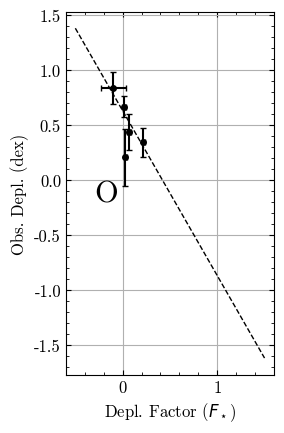

In [23]:
print("A_OI: ", A_OI)
print("B_OI: ", B_OI)
print("sigma_A_OI: ", sigma_A_OI)
print("sigma_B_OI: ", sigma_B_OI)
print("z_OI", z_OI)

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rc('font', **font)
plt.rc('axes', unicode_minus = False)

x_array = np.arange(-0.5, 2.5)
y_array = B_OI + A_OI * (x_array - z_OI)

plt.figure(figsize = (3, 4.5))

plt.errorbar(F_star_array, depletion_OI_array, fmt = 'o', markersize = 4, mfc = 'black', mec = 'black', xerr = sigma_F_star_array, yerr = sigma_depletion_OI_array, ecolor = 'black', capsize = 2, linestyle = 'none')
plt.plot(x_array, y_array, 'k--', linewidth = 1)

plt.text(-0.3, -0.2, 'O', fontsize = 22, fontweight = 'bold', family = 'serif')

plt.xlabel(r'Depl. Factor ($F_\star$)')
plt.ylabel(r'Obs. Depl. (dex)')

plt.tick_params(which = 'both', direction = 'in', top = True, right = True)

plt.rc('axes', unicode_minus = False)

plt.tight_layout()
plt.minorticks_on()
plt.grid()

plt.show()

In [24]:
# END